## Load the relevant library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the dataset

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')
data.head(6)

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Slice the dataset so as to get the latitude and longitude 

In [3]:
new_data = data.iloc[:,1:3]
new_data.head()

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40


## Draw without clustering to see the difference

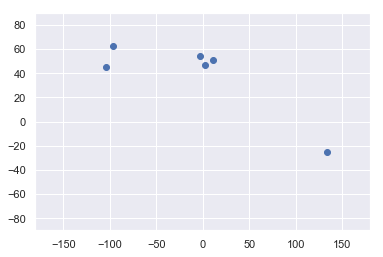

In [4]:
plt.scatter(new_data['Longitude'],new_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Use KMeans function from sklearn library

In [5]:
kmeans = KMeans(3) #for 3 cluster
kmeans.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Predict the Cluster

In [6]:
predict = kmeans.fit_predict(new_data)
predict

array([0, 0, 1, 1, 1, 2])

## Load the dataset with additional cluster column

In [7]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = predict
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


## Use 3 Means Cluster

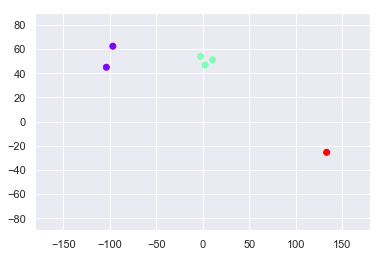

In [8]:
plt.scatter(new_data['Longitude'],new_data['Latitude'],c=data_with_cluster['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [9]:
kmeans.inertia_

288.1052333333333

In [13]:
wcss = []

for i in range(1,7):
    Kmeans = KMeans(i)
    kmeans.fit(new_data)
    wcss_list = kmeans.inertia_
    wcss.append(wcss_list)
    
wcss

[288.1052333333333,
 288.1052333333333,
 288.1052333333333,
 288.1052333333333,
 288.1052333333333,
 288.1052333333333]

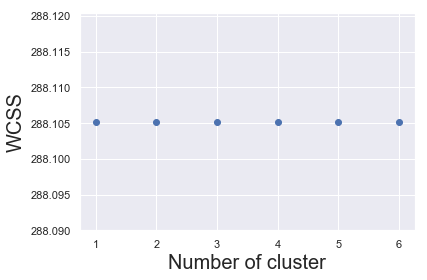

In [14]:
number_cluster = range(1,7)
plt.scatter(number_cluster,wcss)
plt.xlabel('Number of cluster', fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()